In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Define data for each step
data = {
    "Step 1": {
        "Distance": [86, 87, 88, 89, 90, 91, 92, 93],
        "Right Hip": [100, 102, 110, 105, 102, 106, 103, 106, 120],
        "Left Hip": [90, 102, 105, 110, 105, 112, 107, 112, 90],
        "Right Knee": [151, 175, 140, 175, 173, 167, 176, 166, 171],
        "Left Knee": [100, 121.08, 90, 122, 121.7, 141, 144, 143, 147],
        "Left Trunk": [163, 154, 173, 144, 134, 143, 153, 154, 156],
        "Right Trunk": [166, 146, 176, 116, 104, 107, 107, 104, 165],
        "Elbow": [155, 167, 155, 162, 152, 154, 127, 121, 134],
        "Shoulder": [36, 117, 40, 111, 122, 112, 101, 86, 82],
    },
    "Step 2": {
        "Distance": [83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93],
        "Right Hip": [71, 80, 84, 87, 92, 90, 116, 96, 70, 118, 90],
        "Left Hip": [97, 67, 63, 74, 104, 97, 94, 104, 99, 107, 97],
        "Right Knee": [138, 138, 131, 145, 153, 127, 122, 142, 162, 144, 157],
        "Left Knee": [150, 144, 139, 141, 147, 132, 165, 133, 154, 167, 132],
        "Left Trunk": [160, 152, 152, 163, 167, 162, 144, 166, 146, 137, 172],
        "Right Trunk": [160, 147, 157, 126, 137, 138, 131, 127, 132, 143, 148],
        "Elbow": [166, 174, 176, 169, 167, 169, 143, 131, 143, 147, 145],
        "Shoulder": [70, 68, 65, 102, 99, 101, 81, 79, 76, 84, 101],
    },
    "Step 3": {
        "Distance": [83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93],
        "Right Hip": [84, 86, 89, 96, 104, 102, 99, 101, 110, 114, 116],
        "Left Hip": [103, 99, 97, 105, 98, 101, 104, 102, 103, 106, 112],
        "Right Knee": [138, 132, 127, 157, 149, 152, 157, 149, 142, 157, 152],
        "Left Knee": [161, 153, 149, 142, 147, 151, 131, 137, 139, 138, 134],
        "Left Trunk": [142, 147, 154, 173, 169, 170, 145, 160, 163, 125, 132],
        "Right Trunk": [159, 161, 163, 154, 167, 159, 162, 169, 157, 177, 159],
        "Elbow": [161, 160, 162, 157, 159, 155, 152, 149, 152, 152, 153],
        "Shoulder": [79, 69, 67, 74, 86, 92, 102, 87, 96, 57, 61],
    },
    "Step 4": {
        "Distance": [82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93],
        "Right Hip": [94, 104, 99, 97, 101, 92, 97, 100, 110, 104, 103],
        "Left Hip": [92, 122, 110, 139, 123, 132, 111, 141, 121, 121, 114],
        "Right Knee": [138, 131, 134, 141, 147, 151, 132, 166, 149, 139, 161],
        "Left Knee": [139, 145, 143, 148, 142, 138, 147, 143, 136, 151, 149],
        "Left Trunk": [150, 152, 149, 132, 150, 152, 153, 118, 144, 169, 175],
        "Right Trunk": [159, 149, 153, 154, 152, 147, 147, 168, 151, 148, 154],
        "Elbow": [174, 174, 173, 169, 172, 171, 163, 162, 159, 144, 159],
        "Shoulder": [52, 61, 72, 102, 94, 104, 79, 72, 92, 101, 104],
    },
    "Step 5": {
        "Distance": [82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93],
        "Right Hip": [115, 111, 99, 97, 92, 104, 113, 99, 104, 99, 97],
        "Left Hip": [107, 114, 121, 114, 106, 99, 100, 105, 103, 95, 99],
        "Right Knee": [163, 147, 161, 164, 156, 159, 162, 146, 151, 151, 147],
        "Left Knee": [129, 149, 139, 145, 152, 147, 157, 161, 159, 167, 165],
        "Left Trunk": [164, 159, 163, 161, 159, 152, 149, 149, 150, 148, 150],
        "Right Trunk": [166, 156, 163, 150, 157, 157, 149, 152, 152, 145, 151],
        "Elbow": [161, 172, 167, 161, 159, 162, 151, 153, 151, 141, 146],
        "Shoulder": [72, 69, 55, 75, 72, 77, 76, 69, 71, 66, 72],
    },
    "Release": {
        "Distance": [82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 96],
        "Right Hip": [75, 77, 79, 67, 76, 74, 66, 76, 104],
        "Left Hip": [127, 125, 112, 142, 119, 121, 100, 131, 125],
        "Right Knee": [142, 156, 144, 167, 149, 139, 164, 142, 132],
        "Left Knee": [176, 167, 172, 162, 170, 163, 174, 173, 172],
        "Left Trunk": [133, 152, 163, 154, 164, 166, 162, 169, 177],
        "Right Trunk": [159, 164, 168, 166, 170, 168, 169, 163, 164],
        "Elbow": [165, 166, 160, 164, 165, 159, 168, 162, 165],
        "Shoulder": [164, 172, 161, 169, 164, 170, 152, 159, 177],
    }
}

# Convert to numpy arrays for easier plotting
steps = list(data.keys())
distances = np.concatenate([data[step]["Distance"] for step in steps])
angles = {part: np.concatenate([data[step][part] for step in steps]) for part in data["Step 1"].keys() if part != "Distance"}

### 3D Plot to Display:
- Distance on the X-axis
- Angle Measurements on the Y-axis
- Steps on the Z-axis

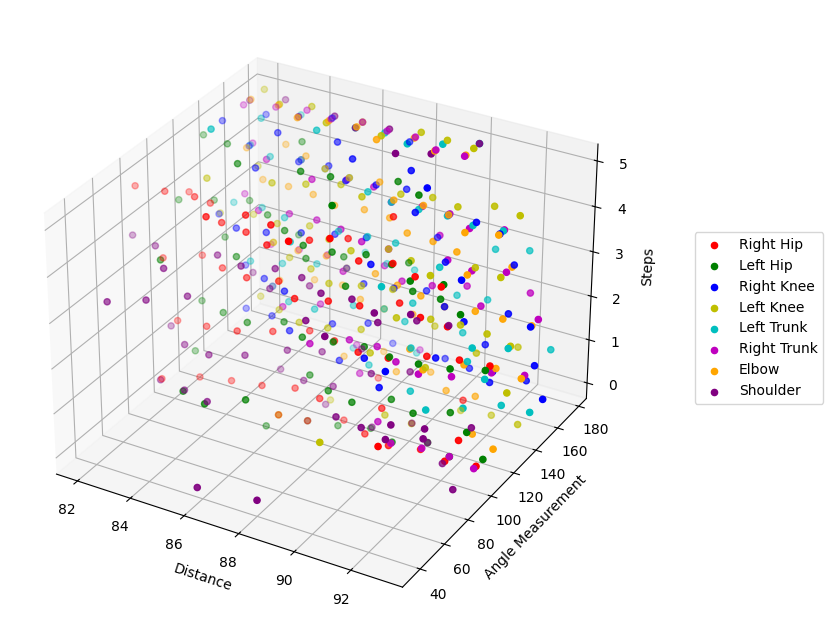

In [3]:
# Function to plot the data
def plot_3d_scatter(data):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Define the body parts that you want to plot
    body_parts = [
        "Right Hip", "Left Hip", "Right Knee", "Left Knee", 
        "Left Trunk", "Right Trunk", "Elbow", "Shoulder"
    ]
    
    # Create a list of color options for each body part
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple']
    
    # Iterate through each step and plot the data
    for i, step in enumerate(data.keys()):
        for j, body_part in enumerate(body_parts):
            # Extract x (Distance), y (Body part measurements), and z (step index)
            x = data[step]["Distance"]
            y = data[step].get(body_part, [])
            
            # Handle the shape mismatch by trimming or filling the data
            min_length = min(len(x), len(y))  # Get the minimum length
            x = x[:min_length]  # Trim x if necessary
            y = y[:min_length]  # Trim y if necessary
            z = np.full_like(x, i)  # Use the index of the step as z-axis
            
            ax.scatter(x, y, z, c=colors[j], label=f'{body_part}' if i == 0 else "", marker='o')
    
    # Set labels for the axes
    ax.set_xlabel('Distance')
    ax.set_ylabel('Angle Measurement')
    ax.set_zlabel('Steps')

    # Add a legend
    ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

    # Show plot
    plt.show()

# Call the function to plot the data
plot_3d_scatter(data)

### 3D Plot to Display:
- Distance on the X-axis
- Steps on the Y-axis
- Angle Measurements on the Z-axis

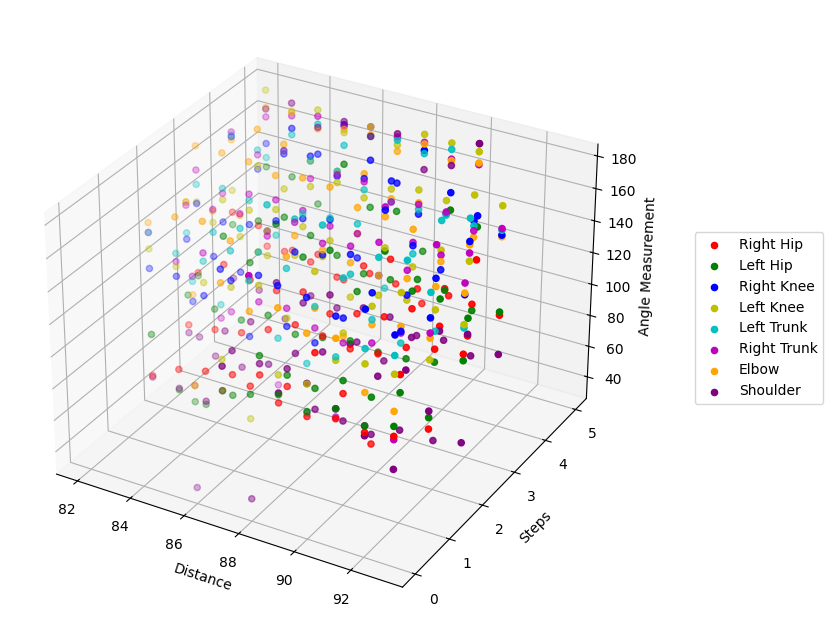

In [4]:
def plot_3d_scatter_modified(data):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    body_parts = [
        "Right Hip", "Left Hip", "Right Knee", "Left Knee", 
        "Left Trunk", "Right Trunk", "Elbow", "Shoulder"
    ]
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple']
    
    for i, step in enumerate(data.keys()):
        for j, body_part in enumerate(body_parts):
            x = data[step]["Distance"]
            z = data[step].get(body_part, [])
            min_length = min(len(x), len(z))
            x = x[:min_length]
            z = z[:min_length]
            y = np.full_like(x, i)  # Steps are now the Y-axis

            ax.scatter(x, y, z, c=colors[j], label=f'{body_part}' if i == 0 else "", marker='o')
    
    ax.set_xlabel('Distance')
    ax.set_ylabel('Steps')
    ax.set_zlabel('Angle Measurement')
    ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

    plt.show()

plot_3d_scatter_modified(data)


### 2D Scatter Plots of Distance vs. Angle for Each Step
- Distance is on the X-axis
- Angle measurements are on the Y-axis
- Each body part has a different color
To accomplish this, we’ll plot individual graphs for each unique step.

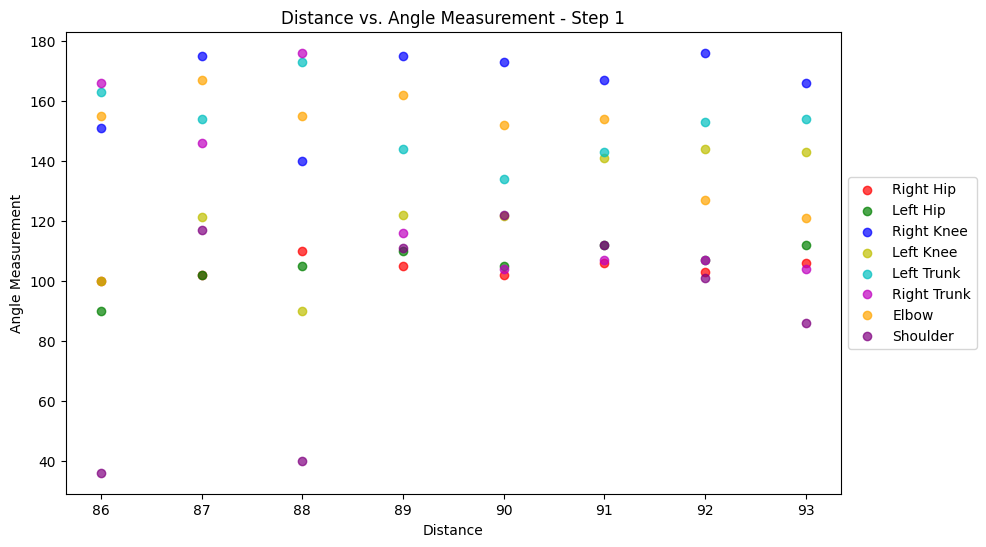

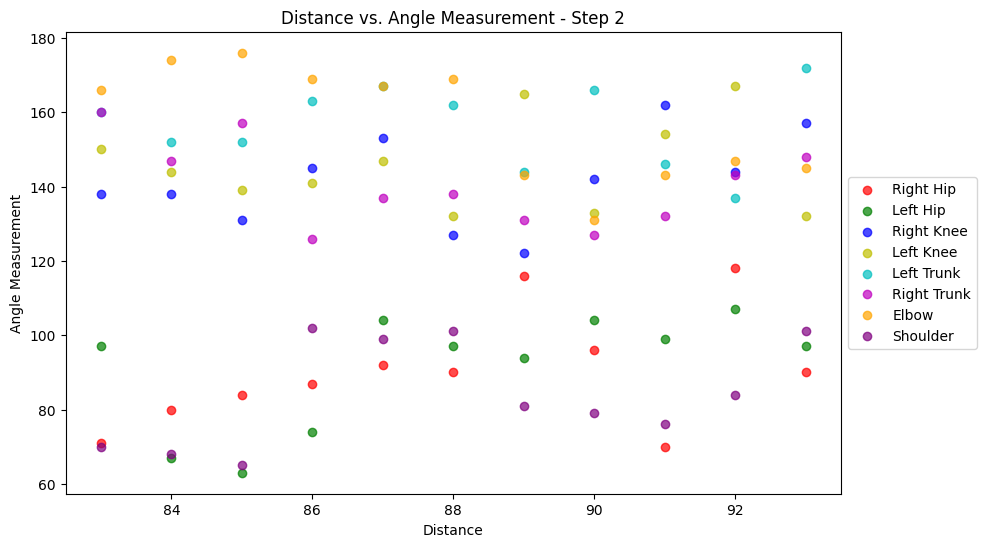

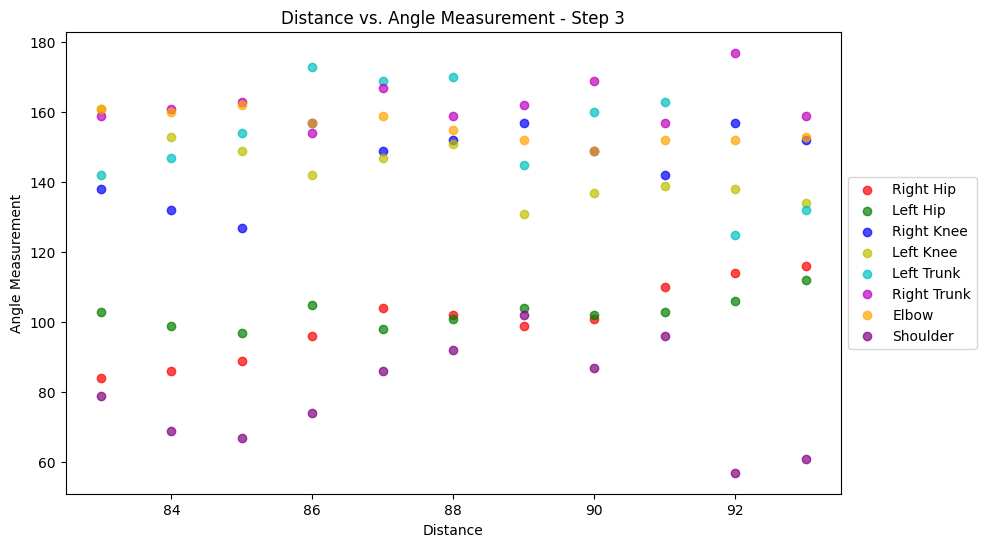

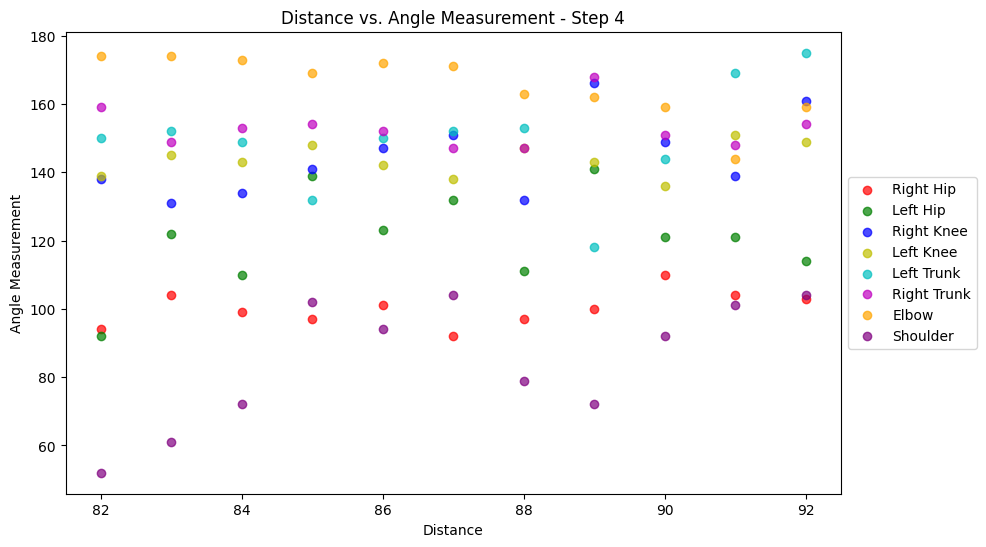

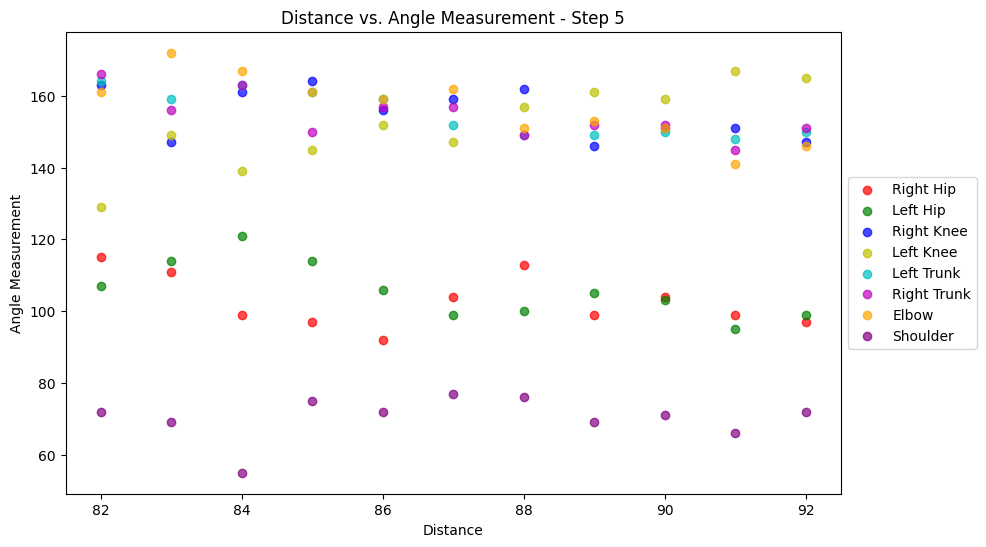

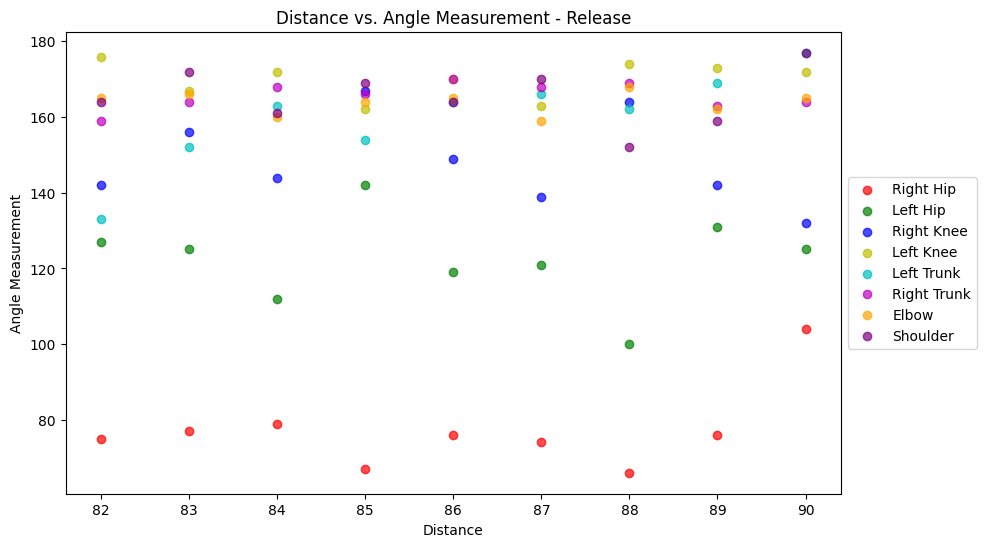

In [5]:
def plot_2d_scatter_distance_vs_angle(data):
    body_parts = [
        "Right Hip", "Left Hip", "Right Knee", "Left Knee", 
        "Left Trunk", "Right Trunk", "Elbow", "Shoulder"
    ]
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple']

    for step in data.keys():
        plt.figure(figsize=(10, 6))
        
        for j, body_part in enumerate(body_parts):
            x = data[step]["Distance"]
            y = data[step].get(body_part, [])
            min_length = min(len(x), len(y))
            x = x[:min_length]
            y = y[:min_length]

            plt.scatter(x, y, color=colors[j], label=body_part, alpha=0.7)
        
        plt.xlabel("Distance")
        plt.ylabel("Angle Measurement")
        plt.title(f"Distance vs. Angle Measurement - {step}")
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()

plot_2d_scatter_distance_vs_angle(data)
